# Challenge

## Before the Challenge: Geospatial Transformation and Visualization
Geospatial data operations allow us to transform any geospatial dataset and prepare it for further analysis and visualization with the final goal of extracting meaningful spatial relationships and patterns.

## Challenge: Creating an Alternative World Map
In this challenge, you will use GeoPandas to create an alternative world map by representing each country as a circle located at the country's administrative boundary's centroid. The size of each circle will be proportional to the logarithm of the country's area, and the circles will be colored based on the country's continent.

## Understanding and Preprocessing the Data

- **Importing libraries and loading data**: Start by importing GeoPandas and loading the built-in world map dataset.
- **Copying the dataset**: Create a copy of the original GeoDataFrame to store the modified geometries.
- **Computing areas and centroids**: Compute the area of each country, take the logarithm of the areas for scaling, and replace each country's geometry with a circle centered at its centroid.

## Visualizing the Data

- **Customizing the plot**: Use Matplotlib to create a visually appealing map with customized plot options. Adjust plotting parameters, such as edge color and line width.

## What You'll Learn
By the end of this challenge, you'll have experience with loading and manipulating geospatial data, computing geometric properties, and creating customized visualizations.

## Hints on How to Proceed

- Ensure the geometries are accurately modified and positioned.
- Use appropriate scaling for circle sizes.
- Apply suitable plot customizations for a clear and informative map.
r and informative mapand informative map

In [5]:
# Importing necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import math
import geodatasets

In [6]:
# Load the built-in world map dataset
world_path = geodatasets.get_path("naturalearth.land")
world = gpd.read_file(world_path)

In [7]:
# Create a copy of the original GeoDataFrame
world_modified = world.copy()

In [9]:
world_modified.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
world_modified.head(3)

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."


In [14]:
# Compute the area of each country and take the logarithm of the areas
areas = [g.area for g in world_modified.geometry.to_list()]
areas_logs = areas_logs = [math.log(a) if a > 0 else 0 for a in areas]

In [15]:
# Update the geometry column by turning each geometry into its centroid and then buffering it
world_modified['geometry'] = [g.centroid.buffer(areas_logs[idx]) for idx, g in enumerate(world_modified.geometry.to_list())]

ValueError: aspect must be finite and positive 

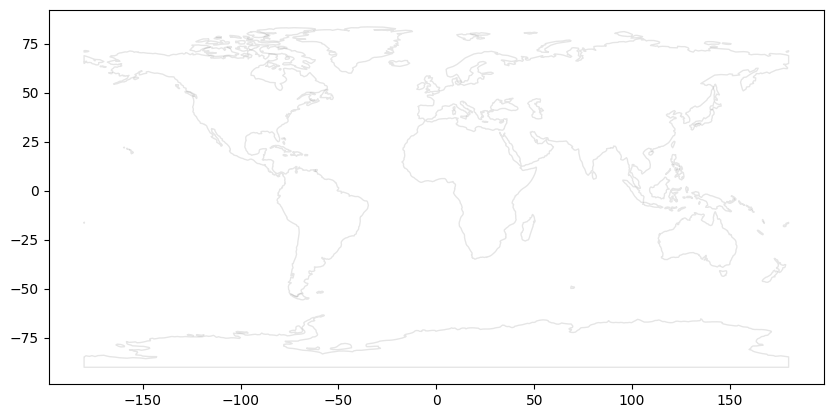

In [17]:
# Plot the original and modified world map
f, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(ax=ax, color='none', edgecolor='k', linewidth=1, alpha=0.1)
world_modified.plot(column='featurecla', ax=ax, cmap='tab20')
plt.show()

This challenge provides a comprehensive introduction to geospatial data manipulation and visualization with a particular focus on changing geometries and visualizing categorical map features.